In [1]:
import numpy as np

np.poly1d([2, -1]) ** 2 + np.poly1d([3, -5]) ** 2 + np.poly1d([5, -6]) ** 2

poly1d([ 38, -94,  62])

In [2]:
import sympy as sym

th = sym.Symbol('th')
diff_th = sym.diff(38*th**2-94*th+64, th)
diff_th

76*th - 94

In [3]:
from pandas import read_csv

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                'PTRATIO', 'B', 'LSTAT', 'PRICE']

boston_pd = read_csv('../data/housing.csv', header=None, delimiter=r"\,+", names=column_names)
boston_pd.head()

/tmp/ipykernel_23375/3503814884.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  boston_pd = read_csv('../data/housing.csv', header=None, delimiter=r"\,+", names=column_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,"""crim""","""zn""","""indus""","""chas""","""nox""","""rm""","""age""","""dis""","""rad""","""tax""","""ptratio""","""b""","""lstat""","""medv"""
1,0.00632,18,2.31,"""0""",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,"""0""",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,"""0""",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,"""0""",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [4]:
boston_pd.drop([0], inplace=True)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18,2.31,"""0""",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,"""0""",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,"""0""",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,"""0""",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,"""0""",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [5]:
import plotly.express as px

fig = px.histogram(boston_pd, x="PRICE")
fig.show()

In [6]:
boston_pd["CHAS"] = boston_pd.CHAS.str.replace('"','')
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.12,76.7,2.2875,1,273,21,396.9,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21,393.45,6.48,22


In [7]:
boston_pd = boston_pd.astype(dtype={'CHAS':'int'},
                             errors='raise',
                             copy=True)

<Axes: >

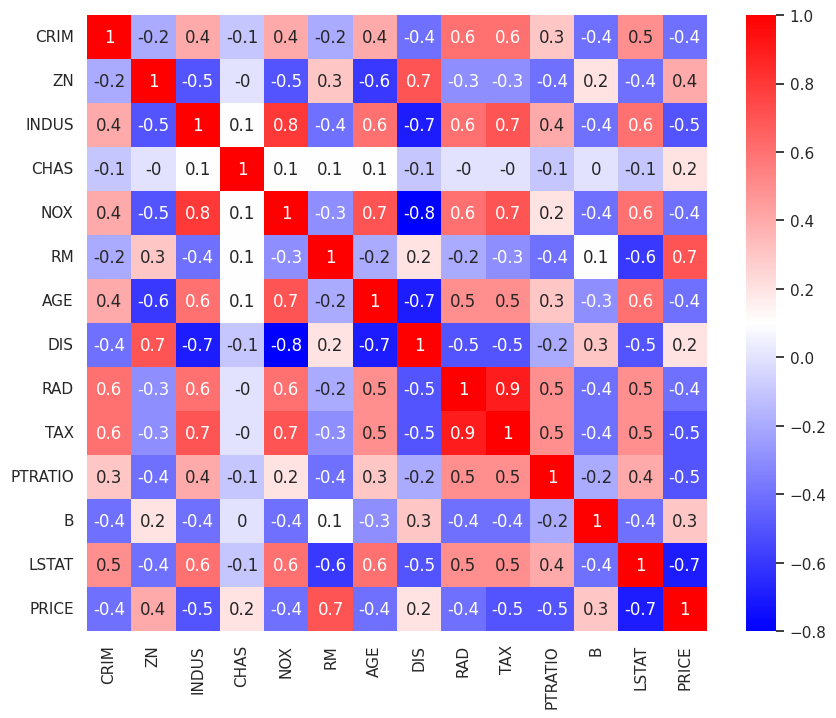

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

corr_mat = boston_pd.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

In [9]:
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    int64 
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  PRICE    506 non-null    object
dtypes: int64(1), object(13)
memory usage: 55.5+ KB


In [10]:
boston_pd = boston_pd.astype(dtype={'CRIM':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'ZN':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'INDUS':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'CHAS':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'NOX':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'RM':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'AGE':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'DIS':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'RAD':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'TAX':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'PTRATIO':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'B':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'LSTAT':'float'},
                             errors='raise',
                             copy=True)

boston_pd = boston_pd.astype(dtype={'PRICE':'float'},
                             errors='raise',
                             copy=True)

boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<Axes: xlabel='LSTAT', ylabel='PRICE'>

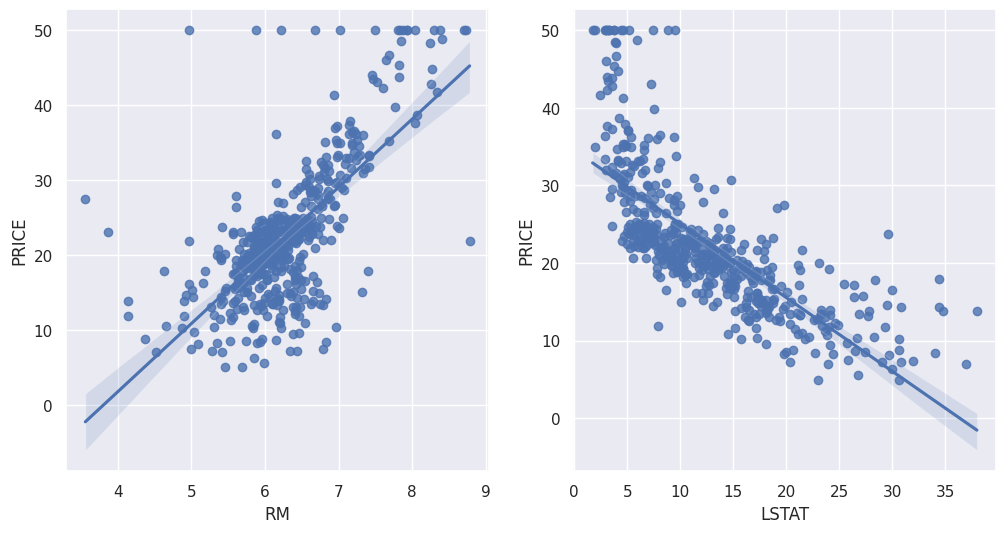

In [11]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=boston_pd, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data=boston_pd, ax=ax[1])

In [12]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

In [22]:
X_train, y_train

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 52   0.04337  21.0   5.64   0.0  0.439  6.115  63.0  6.8147  4.0  243.0   
 266  0.76162  20.0   3.97   0.0  0.647  5.560  62.8  1.9865  5.0  264.0   
 67   0.04379  80.0   3.37   0.0  0.398  5.787  31.1  6.6115  4.0  337.0   
 13   0.09378  12.5   7.87   0.0  0.524  5.889  39.0  5.4509  5.0  311.0   
 348  0.01870  85.0   4.15   0.0  0.429  6.516  27.7  8.5353  4.0  351.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 231  0.53700   0.0   6.20   0.0  0.504  5.981  68.1  3.6715  8.0  307.0   
 17   1.05393   0.0   8.14   0.0  0.538  5.935  29.3  4.4986  4.0  307.0   
 75   0.07896   0.0  12.83   0.0  0.437  6.273   6.0  4.2515  5.0  398.0   
 177  0.07022   0.0   4.05   0.0  0.510  6.020  47.2  3.5549  5.0  296.0   
 339  0.03306   0.0   5.19   0.0  0.515  6.059  37.3  4.8122  5.0  224.0   
 
      PTRATIO       B  
 52      16.8  393.97  
 266     13.0  392.40  
 67      16.1 

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
import numpy as np

from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test data : ", rmse_test)

RMSE of Train Data :  4.642806069019824
RMSE of Test data :  4.931352584146711


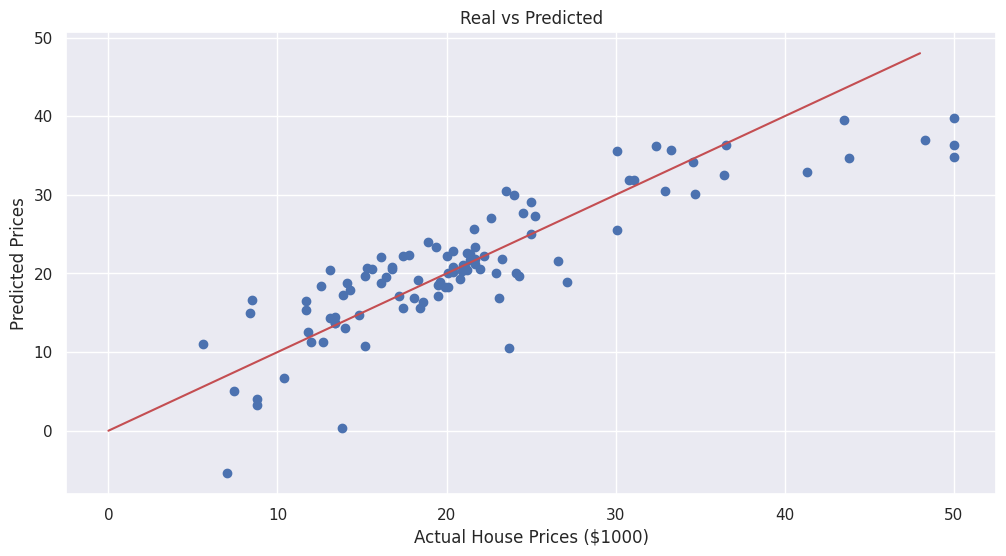

In [16]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted")
plt.plot([0,48], [0, 48], 'r')
plt.show()

In [17]:
X = boston_pd.drop(['PRICE', 'LSTAT'], axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  5.165137874244864
RMSE of Test Data :  5.295595032597155


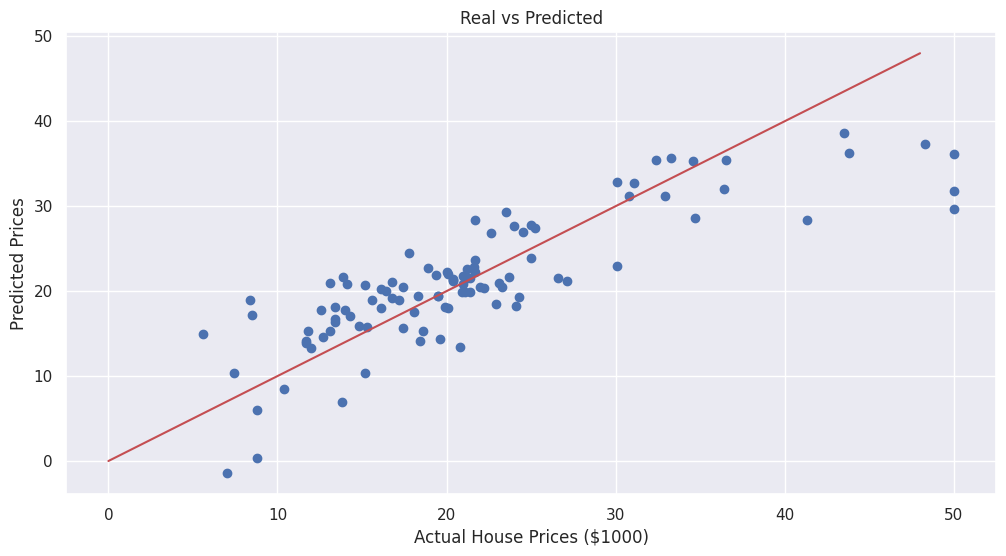

In [19]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted")
plt.plot([0,48], [0, 48], 'r')
plt.show()